In [14]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from wordcloud import WordCloud

#Preguntas de interes

*¿Cuántos juegos ha ganado Atlanta Braves durante el período registrado en el DataFrame?

* ¿Cuál es el promedio de carreras anotadas por juego para Atlanta Braves y New York Mets?

* ¿Cuál es la efectividad de pitcheo promedio de Atlanta Braves (promedio de carreras permitidas por juego)?

* ¿Cuál es el estadio con la mayor asistencia promedio del público en los juegos en casa de Atlanta Braves?

* ¿Cuántas blanqueadas ha logrado Atlanta Braves durante el período registrado?

* ¿Cuál es el promedio de errores cometidos por Atlanta Braves?

* ¿Cuántos jonrones ha conseguido Atlanta Braves durante el período registrado?

* ¿Cuántas bases robadas ha logrado Atlanta Braves?

* ¿Cuántos juegos completos han tenido los lanzadores de Atlanta Braves?

* ¿Cuál es el promedio de bateo del equipo Atlanta Braves (porcentaje de hits sobre turnos al bate) durante el período registrado?

#Obtenemos con la llave API los repoitorios

In [ ]:
#!pip install PyGithub

In [62]:
!pip install GitPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [74]:
# Código sin errores de indentación
my_git = Github("AUTH")
repos = my_git.get_user().get_repos()
for repo in repos:
    print(repo.name)


Api_cool
ch-dsci
ch_data_A-Sci
json_api


In [75]:
asim_code = my_git.get_repo("jack574/ch-dsci")
contents = asim_code.get_contents("")
for contents_file in contents:
  print(contents_file)

ContentFile(path="3-Baseball.csv")
ContentFile(path="README.md")
ContentFile(path="data")


In [76]:
from github import Github

# Create a Github instance
my_git = Github()

# Get the repository
asim_code = my_git.get_repo("jack574/ch-dsci")

# Get the contents of the repository
contents = asim_code.get_contents("")

# Iterate over the contents and print their details
for contents_file in contents:
    print(contents_file)

ContentFile(path="3-Baseball.csv")
ContentFile(path="README.md")
ContentFile(path="data")


In [79]:
import pandas as pd
from io import StringIO

# Obtener el contenido del archivo "3-Baseball.csv"
file_content = asim_code.get_contents("3-Baseball.csv").decoded_content.decode('utf-8')

# Leer el contenido del archivo como un DataFrame
df3 = pd.read_csv(StringIO(file_content))

# Mostrar las primeras columnas del DataFrame
primeras_columnas = df3.iloc[:, :5]  # Puedes ajustar el número de columnas según lo necesites

# Definir el DataFrame con las primeras columnas
df3 = df3

# Mostrar el DataFrame df3
print(df3)


      Unnamed: 0  year league_id division_id  rank  games_played  home_games  \
0              1  1876        NL         NaN     4            70         NaN   
1              2  1876        NL         NaN     1            66         NaN   
2              3  1876        NL         NaN     8            65         NaN   
3              4  1876        NL         NaN     2            69         NaN   
4              5  1876        NL         NaN     5            69         NaN   
...          ...   ...       ...         ...   ...           ...         ...   
2779        2780  2020        NL           C     3            58        27.0   
2780        2781  2020        AL           E     1            60        29.0   
2781        2782  2020        AL           W     5            60        30.0   
2782        2783  2020        AL           E     3            60        26.0   
2783        2784  2020        NL           E     4            60        33.0   

      wins  losses division_winner  ...

In [80]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from wordcloud import WordCloud

# Pregunta 1: ¿Cuántos juegos ha ganado Atlanta Braves durante el período registrado en el DataFrame?
juegos_ganados_braves = df3[df3["team_name"] == "Atlanta Braves"]["wins"].sum()
print("Atlanta Braves ha ganado un total de", juegos_ganados_braves, "juegos durante el período registrado.")

# Pregunta 2: ¿Cuál es el promedio de carreras anotadas por juego para Atlanta Braves?
promedio_carreras_anotadas = df3[df3["team_name"] == "Atlanta Braves"]["runs_scored"].mean()
print("El promedio de carreras anotadas por juego para Atlanta Braves es:", promedio_carreras_anotadas)

# Pregunta 3: ¿Cuál es la efectividad de pitcheo promedio de Atlanta Braves (promedio de carreras permitidas por juego)?
efectividad_pitcheo_promedio = df3[df3["team_name"] == "Atlanta Braves"]["earned_run_average"].mean()
print("La efectividad de pitcheo promedio de Atlanta Braves es:", efectividad_pitcheo_promedio)

# Pregunta 4: ¿Cuál es el estadio con la mayor asistencia promedio del público en los juegos en casa de Atlanta Braves?
estadio_mayor_asistencia = df3[df3["team_name"] == "Atlanta Braves"].groupby("ball_park")["home_attendance"].mean().idxmax()
asistencia_promedio_mayor = df3[df3["team_name"] == "Atlanta Braves"].groupby("ball_park")["home_attendance"].mean().max()
print("El estadio con la mayor asistencia promedio del público en los juegos en casa de Atlanta Braves es:", estadio_mayor_asistencia)
print("La asistencia promedio en ese estadio es:", asistencia_promedio_mayor)

# Pregunta 5: ¿Cuántas blanqueadas ha logrado Atlanta Braves durante el período registrado?
blanqueadas_braves = df3[df3["team_name"] == "Atlanta Braves"]["shutouts"].sum()
print("Atlanta Braves ha logrado un total de", blanqueadas_braves, "blanqueadas durante el período registrado.")

# Pregunta 6: ¿Cuál es el promedio de errores cometidos por Atlanta Braves?
promedio_errores_braves = df3[df3["team_name"] == "Atlanta Braves"]["errors"].mean()
print("El promedio de errores cometidos por Atlanta Braves es:", promedio_errores_braves)

# Pregunta 7: ¿Cuántos jonrones ha conseguido Atlanta Braves durante el período registrado?
jonrones_braves = df3[df3["team_name"] == "Atlanta Braves"]["homeruns"].sum()
print("Atlanta Braves ha conseguido un total de", jonrones_braves, "jonrones durante el período registrado.")

# Pregunta 8: ¿Cuántas bases robadas ha logrado Atlanta Braves?
bases_robadas_braves = df3[df3["team_name"] == "Atlanta Braves"]["stolen_bases"].sum()
print("Atlanta Braves ha logrado un total de", bases_robadas_braves, "bases robadas durante el período registrado.")

# Pregunta 9: ¿Cuántos juegos completos han tenido los lanzadores de Atlanta Braves?
juegos_completos_braves = df3[df3["team_name"] == "Atlanta Braves"]["complete_games"].sum()
print("Los lanzadores de Atlanta Braves han tenido un total de", juegos_completos_braves, "juegos completos durante el período registrado.")

# Pregunta 10: ¿Cuál es el promedio de bateo del equipo Atlanta Braves (porcentaje de hits sobre turnos al bate) durante el período registrado?
promedio_bateo_braves = df3[df3["team_name"] == "Atlanta Braves"]["hits"].sum() / df3[df3["team_name"] == "Atlanta Braves"]["at_bats"].sum()
print("El promedio de bateo del equipo Atlanta Braves es:", promedio_bateo_braves)



Atlanta Braves ha ganado un total de 4468 juegos durante el período registrado.
El promedio de carreras anotadas por juego para Atlanta Braves es: 689.7454545454545
La efectividad de pitcheo promedio de Atlanta Braves es: 3.823090909090909
El estadio con la mayor asistencia promedio del público en los juegos en casa de Atlanta Braves es: Turner Field
La asistencia promedio en ese estadio es: 2622604.75
Atlanta Braves ha logrado un total de 534 blanqueadas durante el período registrado.
El promedio de errores cometidos por Atlanta Braves es: 121.52727272727273
Atlanta Braves ha conseguido un total de 8349 jonrones durante el período registrado.
Atlanta Braves ha logrado un total de 4735.0 bases robadas durante el período registrado.
Los lanzadores de Atlanta Braves han tenido un total de 927 juegos completos durante el período registrado.
El promedio de bateo del equipo Atlanta Braves es: 0.2572819648675498


## Demostremos con graficos las preguntas
### Teniendo presentes la rivalidad que existe entre los Mets de NY Y los Bravos de Atlanta .

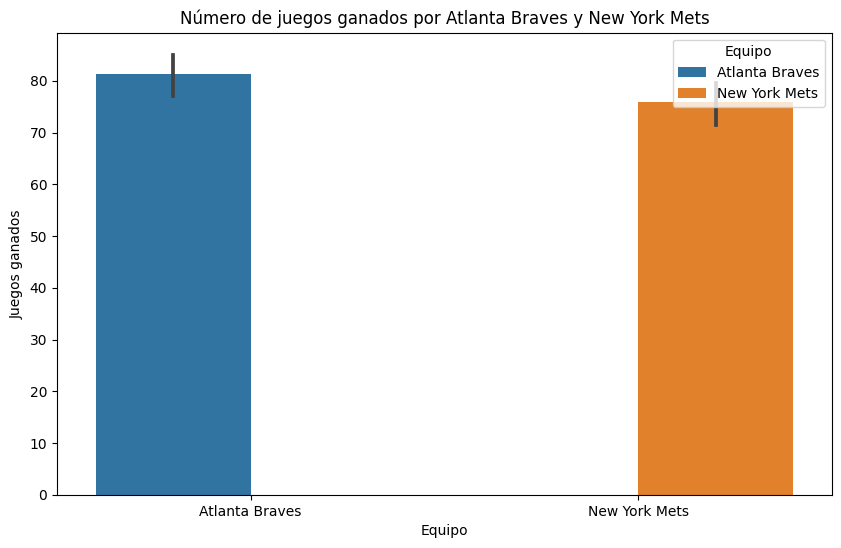

In [81]:
# Filtrar los datos para obtener solo los registros de Atlanta Braves y New York Mets
atlanta_braves_data = df3[df3["team_name"] == "Atlanta Braves"]
new_york_mets_data = df3[df3["team_name"] == "New York Mets"]

# Gráfico de barras para mostrar el número de juegos ganados por Atlanta Braves y New York Mets
plt.figure(figsize=(10, 6))
sns.barplot(x="team_name", y="wins", data=pd.concat([atlanta_braves_data, new_york_mets_data]), hue="team_name")
plt.title("Número de juegos ganados por Atlanta Braves y New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Juegos ganados")
plt.legend(title="Equipo", loc="upper right")
plt.show()


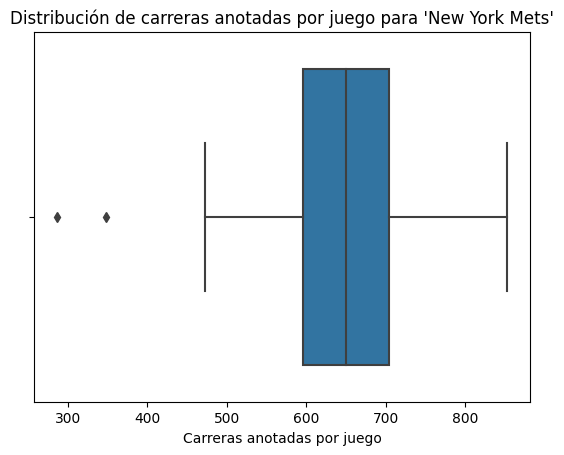

In [82]:
# Pregunta 2: ¿Cuál es el promedio de carreras anotadas por juego para Atlanta Braves?
sns.boxplot(x=df3[df3["team_name"] == "New York Mets"]["runs_scored"])
plt.title("Distribución de carreras anotadas por juego para 'New York Mets'")
plt.xlabel("Carreras anotadas por juego")
plt.show()


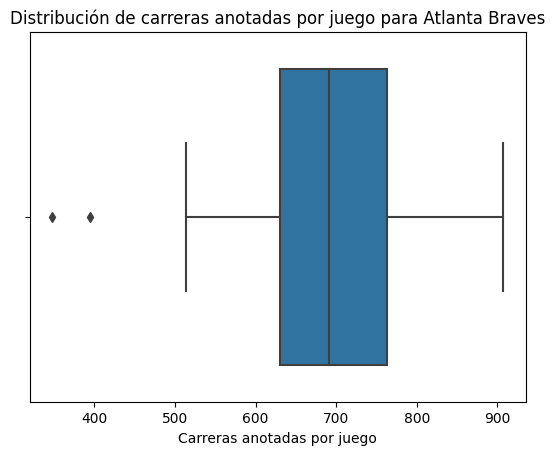

In [83]:
# Pregunta 2: ¿Cuál es el promedio de carreras anotadas por juego para Atlanta Braves?
sns.boxplot(x=df3[df3["team_name"] == "Atlanta Braves"]["runs_scored"])
plt.title("Distribución de carreras anotadas por juego para Atlanta Braves")
plt.xlabel("Carreras anotadas por juego")
plt.show()

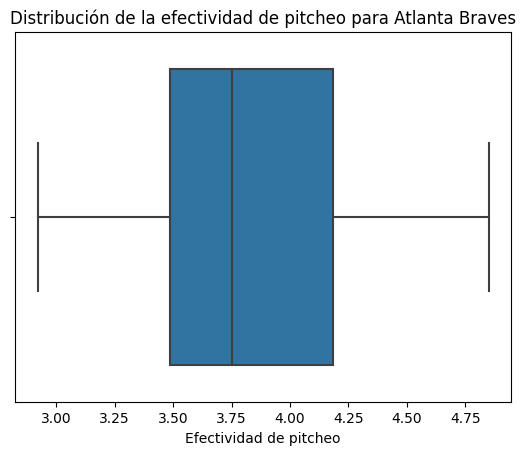

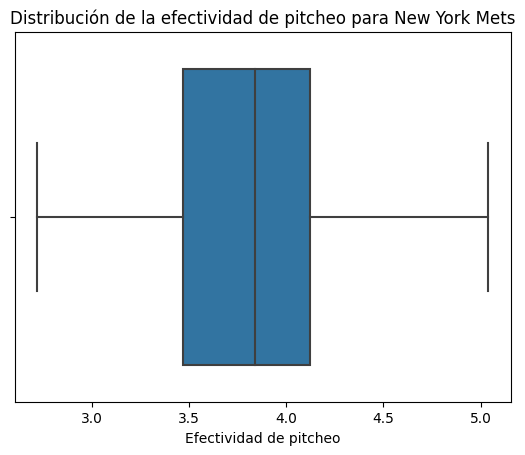

In [86]:
# Pregunta 3: ¿Cuál es la efectividad de pitcheo promedio de Atlanta Braves (promedio de carreras permitidas por juego)?
sns.boxplot(x=df3[df3["team_name"] == "Atlanta Braves"]["earned_run_average"])
plt.title("Distribución de la efectividad de pitcheo para Atlanta Braves")
plt.xlabel("Efectividad de pitcheo")
plt.show()
sns.boxplot(x=df3[df3["team_name"] == 'New York Mets']["earned_run_average"])
plt.title("Distribución de la efectividad de pitcheo para New York Mets")
plt.xlabel("Efectividad de pitcheo")
plt.show()

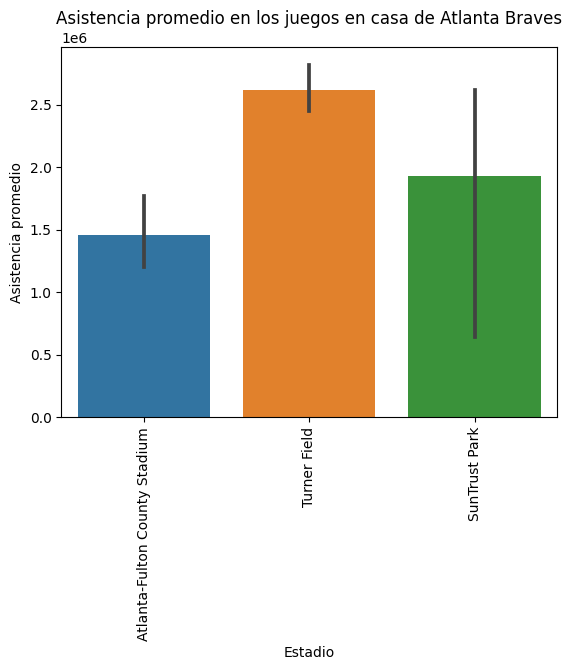

In [87]:
# Pregunta 4: ¿Cuál es el estadio con la mayor asistencia promedio del público en los juegos en casa de Atlanta Braves?
sns.barplot(x="ball_park", y="home_attendance", data=df3[df3["team_name"] == "Atlanta Braves"])
plt.title("Asistencia promedio en los juegos en casa de Atlanta Braves")
plt.xlabel("Estadio")
plt.ylabel("Asistencia promedio")
plt.xticks(rotation=90)
plt.show()

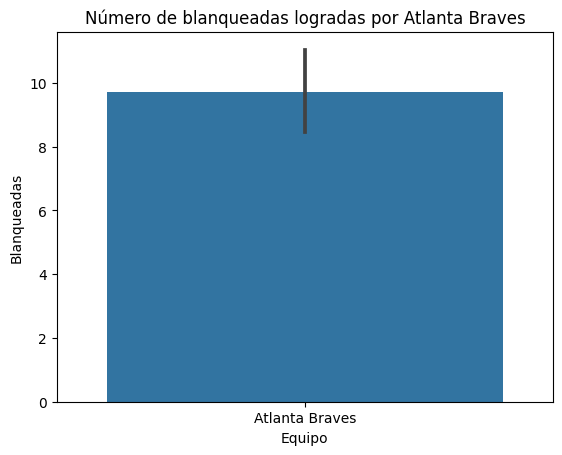

In [88]:
# Pregunta 5: ¿Cuántas blanqueadas ha logrado Atlanta Braves durante el período registrado?
sns.barplot(x="team_name", y="shutouts", data=df3[df3["team_name"] == "Atlanta Braves"])
plt.title("Número de blanqueadas logradas por Atlanta Braves")
plt.xlabel("Equipo")
plt.ylabel("Blanqueadas")
plt.show()

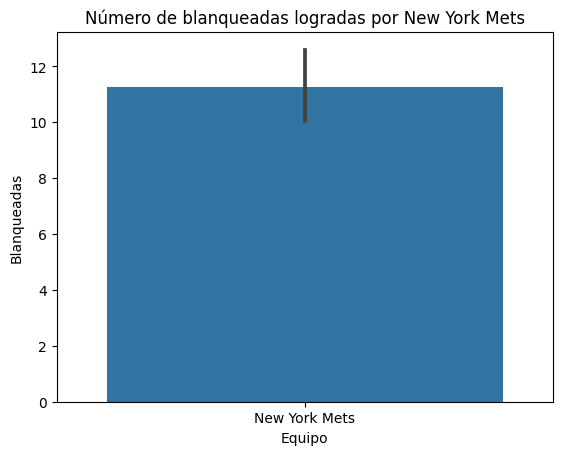

In [89]:
sns.barplot(x="team_name", y="shutouts", data=df3[df3["team_name"] == 'New York Mets'])
plt.title("Número de blanqueadas logradas por New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Blanqueadas")
plt.show()

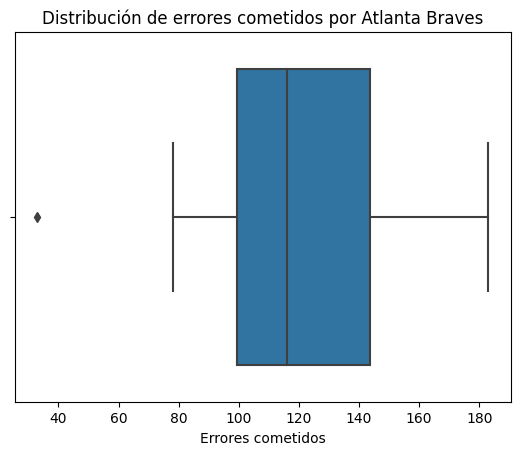

In [90]:
# Pregunta 6: ¿Cuál es el promedio de errores cometidos por Atlanta Braves?
sns.boxplot(x=df3[df3["team_name"] == "Atlanta Braves"]["errors"])
plt.title("Distribución de errores cometidos por Atlanta Braves")
plt.xlabel("Errores cometidos")
plt.show()

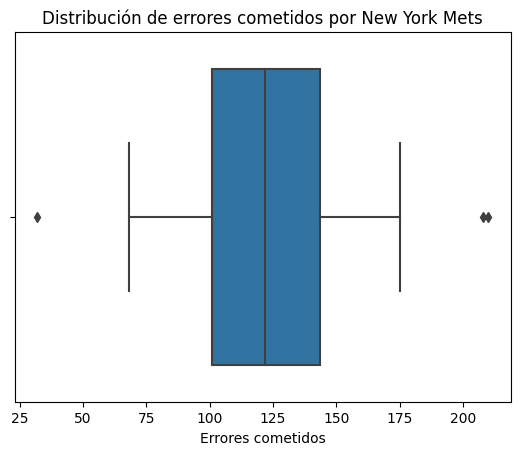

In [91]:
sns.boxplot(x=df3[df3["team_name"] == "New York Mets"]["errors"])
plt.title("Distribución de errores cometidos por New York Mets")
plt.xlabel("Errores cometidos")
plt.show()

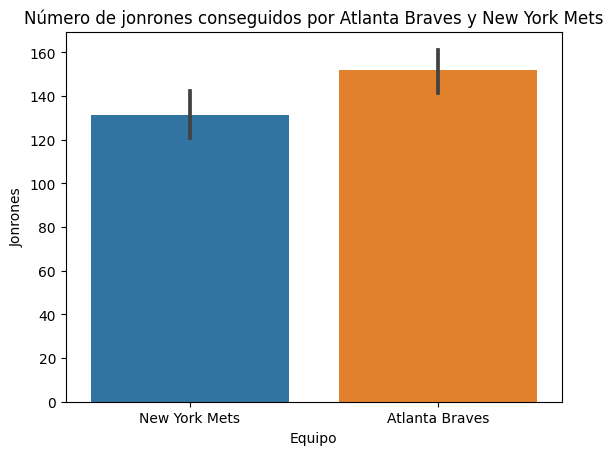

In [92]:
# Pregunta 7: ¿Cuántos jonrones ha conseguido Atlanta Braves durante el período registrado?
# Filtrar los datos para obtener solo los registros de Atlanta Braves y New York Mets
data_atlanta_mets = df3[df3["team_name"].isin(["Atlanta Braves", "New York Mets"])]

# Crear la gráfica de barras
sns.barplot(x="team_name", y="homeruns", data=data_atlanta_mets)

# Personalizar el título y los ejes
plt.title("Número de jonrones conseguidos por Atlanta Braves y New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Jonrones")

# Mostrar la gráfica
plt.show()



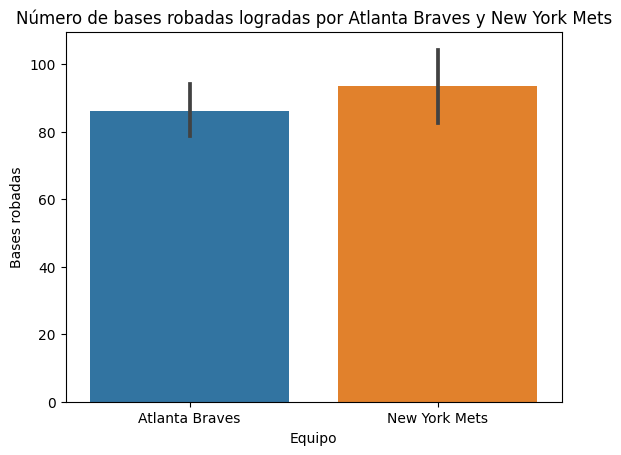

In [93]:
# Pregunta 8: ¿Cuántas bases robadas ha logrado Atlanta Braves?
# Filtrar los datos para obtener solo los registros de Atlanta Braves y New York Mets
data_atlanta_braves = df3[df3["team_name"] == "Atlanta Braves"]
data_new_york_mets = df3[df3["team_name"] == "New York Mets"]

# Combinar los datos de ambos equipos en un solo DataFrame
data_combined = pd.concat([data_atlanta_braves, data_new_york_mets])

# Crear la gráfica de barras
sns.barplot(x="team_name", y="stolen_bases", data=data_combined)

# Personalizar el título y los ejes
plt.title("Número de bases robadas logradas por Atlanta Braves y New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Bases robadas")

# Mostrar la gráfica
plt.show()


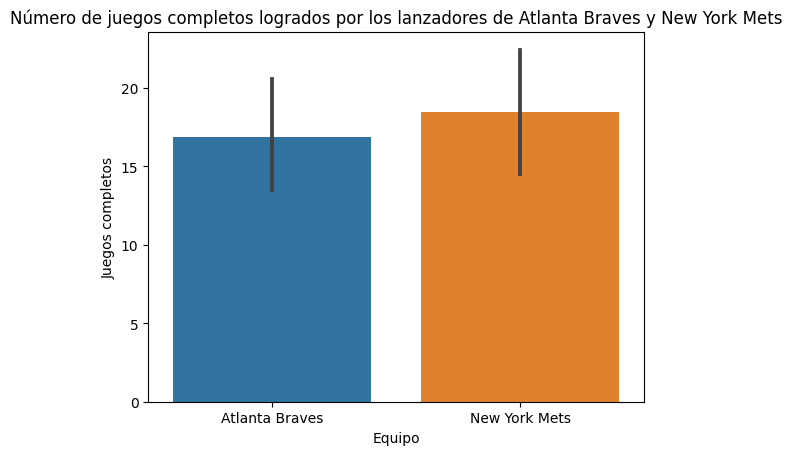

In [94]:
# Pregunta 9: ¿Cuántos juegos completos han tenido los lanzadores de Atlanta Braves?
# Filtrar los datos para obtener solo los registros de Atlanta Braves y New York Mets
data_atlanta_braves = df3[df3["team_name"] == "Atlanta Braves"]
data_new_york_mets = df3[df3["team_name"] == "New York Mets"]

# Combinar los datos de ambos equipos en un solo DataFrame
data_combined = pd.concat([data_atlanta_braves, data_new_york_mets])

# Crear la gráfica de barras
sns.barplot(x="team_name", y="complete_games", data=data_combined)

# Personalizar el título y los ejes
plt.title("Número de juegos completos logrados por los lanzadores de Atlanta Braves y New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Juegos completos")

# Mostrar la gráfica
plt.show()


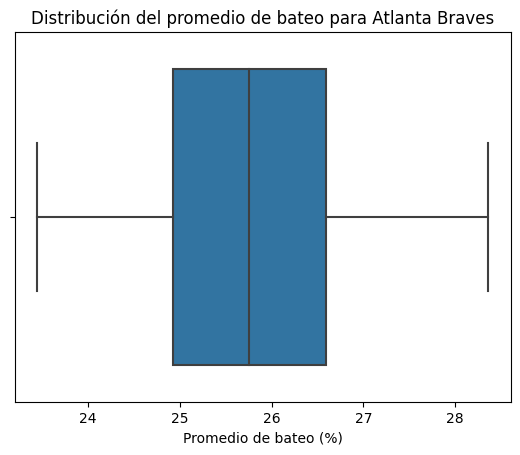

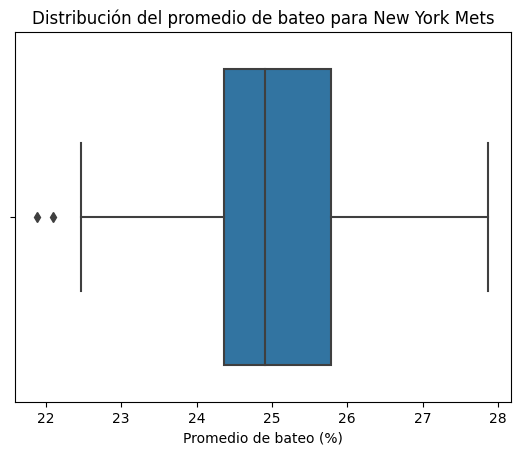

In [95]:
# Pregunta 10: ¿Cuál es el promedio de bateo del equipo Atlanta Braves (porcentaje de hits sobre turnos al bate) durante el período registrado?
sns.boxplot(x=(df3[df3["team_name"] == "Atlanta Braves"]["hits"] / df3[df3["team_name"] == "Atlanta Braves"]["at_bats"]) * 100)
plt.title("Distribución del promedio de bateo para Atlanta Braves")
plt.xlabel("Promedio de bateo (%)")
plt.show()

sns.boxplot(x=(df3[df3["team_name"] == "New York Mets"]["hits"] / df3[df3["team_name"] == "New York Mets"]["at_bats"]) * 100)
plt.title("Distribución del promedio de bateo para New York Mets")
plt.xlabel("Promedio de bateo (%)")
plt.show()


### Data Wrangling

In [96]:
df3["team_name"].isna().sum()

0

In [97]:
df3

,Unnamed: 0,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1,1876,NL,NaN,4,70,NaN,39,31,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,2,1876,NL,NaN,1,66,NaN,52,14,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,3,1876,NL,NaN,8,65,NaN,9,56,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,4,1876,NL,NaN,2,69,NaN,47,21,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,5,1876,NL,NaN,5,69,NaN,30,36,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2780,2020,NL,C,3,58,27.0,30,28,N,...,376,69,204,464,33,46,0.983,St. Louis Cardinals,Busch Stadium III,0.0
2780,2781,2020,AL,E,1,60,29.0,40,20,Y,...,475,70,168,552,33,52,0.985,Tampa Bay Rays,Tropicana Field,0.0
2781,2782,2020,AL,W,5,60,30.0,22,38,N,...,479,81,236,489,40,40,0.981,Texas Rangers,Globe Life Field,0.0
2782,2783,2020,AL,E,3,60,26.0,32,28,N,...,517,81,250,519,38,47,0.982,Toronto Blue Jays,Sahlen Field,0.0


### Limpieza informacion irrelevante

### Seleccionar solo las columnas de interés:

In [98]:
columnas_interes = ['year', 'league_id', 'division_id', 'rank', 'games_played', 'home_games', 'wins', 'losses', 'division_winner', 'wild_card_winner', 'league_winner', 'world_series_winner', 'runs_scored', 'at_bats', 'hits', 'doubles', 'triples', 'homeruns']
df3_columnas_interes = df3[columnas_interes]


### Crear una nueva columna calculada basada en operaciones con otras columnas:

In [99]:
df3['nueva_columna'] = df3['runs_scored'] / df3['games_played']


### Filtrar el DataFrame para incluir solo filas que cumplan con múltiples condiciones:

In [100]:
df3_filtrado = df3[(df3['year'] >= 2000) & (df3['wins'] >= 80)]


### Utilizar el método apply para aplicar una función a una columna:

In [101]:
def funcion_personalizada(valor):
    # Tu lógica para transformar el valor
    return valor * 2

df3['columna_transformada'] = df3['doubles'].apply(funcion_personalizada)


### Remover columnas no deseadas:

In [102]:
columnas_a_eliminar = ['division_id', 'wild_card_winner']
df3_sin_columnas_no_deseadas = df3.drop(columns=columnas_a_eliminar)

### Filtrar el DataFrame para incluir solo filas con más de 100 juegos jugados y más de 60 juegos ganados:

In [103]:
# Filtrar el DataFrame
df3_filtrado = df3[(df3['games_played'] > 100) & (df3['wins'] > 60)]

# Visualizar el DataFrame resultante
print(df3_filtrado)


      Unnamed: 0  year league_id division_id  rank  games_played  home_games  \
60            61  1884        NL         NaN     3           114         NaN   
61            62  1884        NL         NaN     2           116         NaN   
62            63  1884        NL         NaN     5           112         NaN   
65            66  1884        NL         NaN     4           116         NaN   
67            68  1884        NL         NaN     1           114         NaN   
...          ...   ...       ...         ...   ...           ...         ...   
2749        2750  2019        NL           C     1           162        81.0   
2750        2751  2019        AL           E     2           162        81.0   
2751        2752  2019        AL           W     3           162        81.0   
2752        2753  2019        AL           E     4           162        81.0   
2753        2754  2019        NL           E     2           162        81.0   

      wins  losses division_winner  ...

###Crear una nueva columna que contenga el porcentaje de victorias para cada equipo:

In [104]:
# Crear la nueva columna
df3['porcentaje_victorias'] = df3['wins'] / df3['games_played'] * 100

# Visualizar las primeras filas del DataFrame con la nueva columna
print(df3.head())


   Unnamed: 0  year league_id division_id  rank  games_played  home_games  \
0           1  1876        NL         NaN     4            70         NaN   
1           2  1876        NL         NaN     1            66         NaN   
2           3  1876        NL         NaN     8            65         NaN   
3           4  1876        NL         NaN     2            69         NaN   
4           5  1876        NL         NaN     5            69         NaN   

   wins  losses division_winner  ... strikeouts_by_pitchers errors  \
0    39      31             NaN  ...                     77    442   
1    52      14             NaN  ...                     51    282   
2     9      56             NaN  ...                     60    469   
3    47      21             NaN  ...                    114    337   
4    30      36             NaN  ...                    125    397   

  double_plays  fielding_percentage                team_name  \
0           42                0.860          Boston 

In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2784 non-null   int64  
 1   year                    2784 non-null   int64  
 2   league_id               2784 non-null   object 
 3   division_id             1438 non-null   object 
 4   rank                    2784 non-null   int64  
 5   games_played            2784 non-null   int64  
 6   home_games              2556 non-null   float64
 7   wins                    2784 non-null   int64  
 8   losses                  2784 non-null   int64  
 9   division_winner         1410 non-null   object 
 10  wild_card_winner        774 non-null    object 
 11  league_winner           2756 non-null   object 
 12  world_series_winner     2536 non-null   object 
 13  runs_scored             2784 non-null   int64  
 14  at_bats                 2784 non-null   

In [108]:
df3.head()

,Unnamed: 0,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,...,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance,nueva_columna,columna_transformada,porcentaje_victorias
0,1,1876,NL,NaN,4,70,NaN,39,31,NaN,...,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN,6.728571,192,55.714286
1,2,1876,NL,NaN,1,66,NaN,52,14,NaN,...,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN,9.454545,262,78.787879
2,3,1876,NL,NaN,8,65,NaN,9,56,NaN,...,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN,3.661538,102,13.846154
3,4,1876,NL,NaN,2,69,NaN,47,21,NaN,...,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN,6.217391,192,68.115942
4,5,1876,NL,NaN,5,69,NaN,30,36,NaN,...,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN,4.057971,136,43.478261


### Ingenieria de Datos

####Calcular el porcentaje de juegos ganados por Atlanta Braves en relación con los juegos totales jugados:

In [109]:
df3["porcentaje_victorias"] = np.round(100 * df3["wins"] / df3["games_played"], 2)


####Crear una columna para representar si Atlanta Braves ganó la World Series durante el período registrado:

In [110]:
df3["ganador_world_series"] = df3["world_series_winner"].apply(lambda x: 1 if x == "Atlanta Braves" else 0)


### Calcular el promedio de carreras anotadas por juego para Atlanta Braves:

In [111]:
df3["promedio_carreras"] = np.round(df3["runs_scored"] / df3["games_played"], 2)


###Crear una columna para representar si Atlanta Braves fue el ganador de la liga durante el período registrado:

In [112]:
df3["ganador_liga"] = df3["league_winner"].apply(lambda x: 1 if x == "Atlanta Braves" else 0)


###Calcular el promedio de jonrones por juego para Atlanta Braves:

In [113]:
df3["promedio_jonrones"] = np.round(df3["homeruns"] / df3["games_played"], 2)


###Porcentaje de juegos ganados por Atlanta Braves:

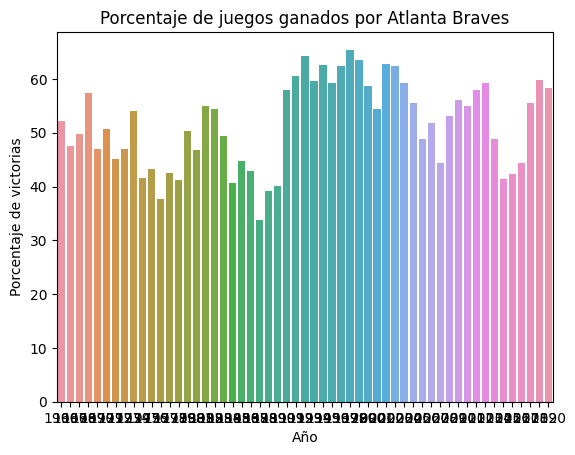

In [114]:
sns.barplot(x="year", y="porcentaje_victorias", data=df3[df3["team_name"] == "Atlanta Braves"])
plt.title("Porcentaje de juegos ganados por Atlanta Braves")
plt.xlabel("Año")
plt.ylabel("Porcentaje de victorias")
plt.show()


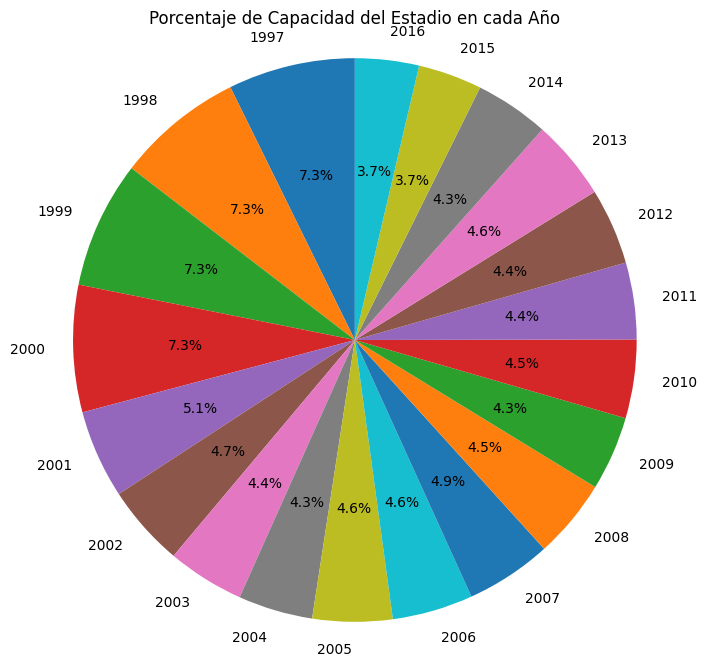

In [115]:
# Datos de Home Attendance at Turner Field
years = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
stadium_capacity_percent = [100, 100, 100, 100, 69.6, 64.2, 60.7, 58.7, 62.9, 63.6, 67.7, 62.4, 58.5, 61.9, 60.4, 60.1, 63.3, 58.4, 50.3, 50.3]

# Crear un DataFrame con la información
data = {
    "Año": years,
    "Porcentaje de Capacidad": stadium_capacity_percent
}

df_stadium_capacity = pd.DataFrame(data)

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(df_stadium_capacity["Porcentaje de Capacidad"], labels=df_stadium_capacity["Año"], autopct='%1.1f%%', startangle=90)
plt.title("Porcentaje de Capacidad del Estadio en cada Año")
plt.axis('equal')
plt.show()


###Ganador de la World Series por año:

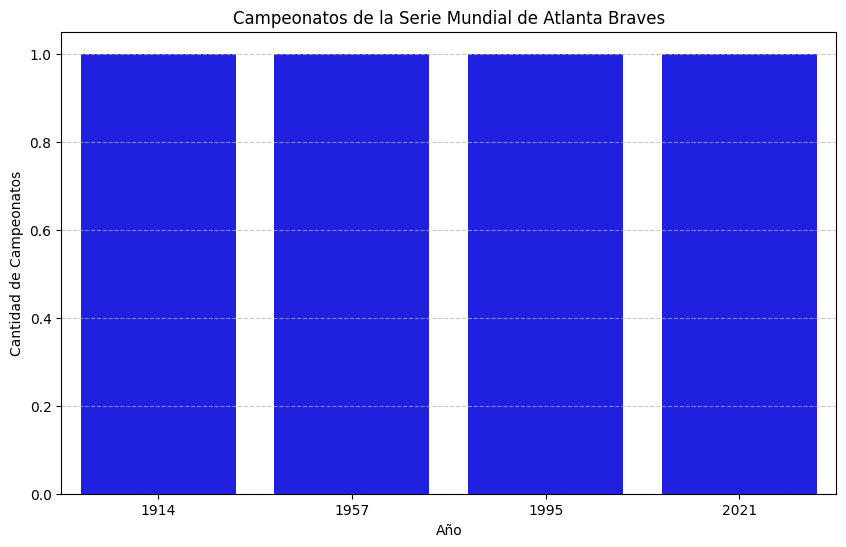

In [116]:
# Años y cantidad de campeonatos de la Serie Mundial ganados por Atlanta Braves
anos_campeonatos = [1914, 1957, 1995, 2021]
cantidad_campeonatos = [1, 1, 1, 1]

# Crear un DataFrame con la información de los campeonatos
campeonatos_data = {
    "Año": anos_campeonatos,
    "Cantidad de Campeonatos": cantidad_campeonatos
}

df_campeonatos = pd.DataFrame(campeonatos_data)

# Visualizar los campeonatos de la Serie Mundial de Atlanta Braves
plt.figure(figsize=(10, 6))
sns.barplot(x="Año", y="Cantidad de Campeonatos", data=df_campeonatos, color="blue")
plt.xlabel("Año")
plt.ylabel("Cantidad de Campeonatos")
plt.title("Campeonatos de la Serie Mundial de Atlanta Braves")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###Promedio de carreras anotadas por juego para Atlanta Braves:

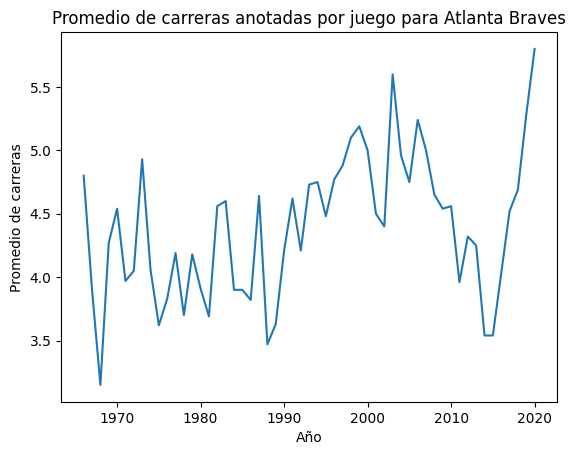

In [117]:
sns.lineplot(x="year", y="promedio_carreras", data=df3[df3["team_name"] == "Atlanta Braves"])
plt.title("Promedio de carreras anotadas por juego para Atlanta Braves")
plt.xlabel("Año")
plt.ylabel("Promedio de carreras")
plt.show()


###Ganador de la liga por año:

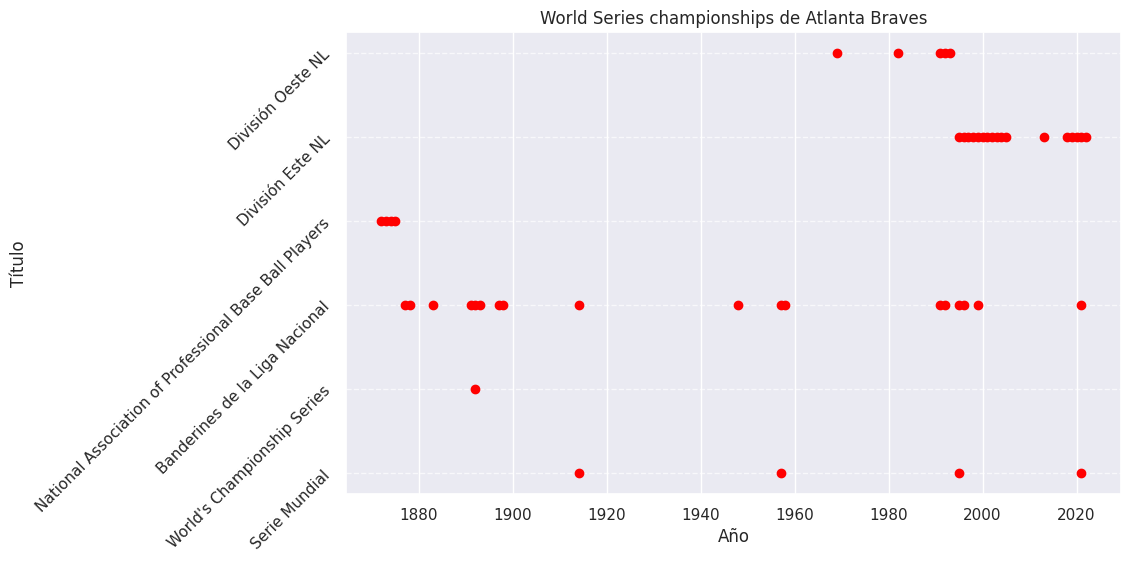

In [162]:
# Años en los que ganaron la Serie Mundial
serie_mundial_anos = [1914, 1957, 1995, 2021]

# Años en los que ganaron la World's Championship Series
world_championship_anos = [1892]

# Años en los que obtuvieron el banderín de la Liga Nacional
banderines_liga_nacional_anos = [1877, 1878, 1883, 1891, 1892, 1893, 1897, 1898, 1914, 1948, 1957, 1958, 1991, 1992, 1995, 1996, 1999, 2021]

# Años en los que ganaron la National Association of Professional Base Ball Players
national_association_anos = [1872, 1873, 1874, 1875]

# Años en los que ganaron la División Este NL
division_este_nl_anos = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2013, 2018, 2019, 2020, 2021, 2022]

# Años en los que ganaron la División Oeste NL
division_oeste_nl_anos = [1969, 1982, 1991, 1992, 1993]

# Crear un DataFrame con la información del palmarés
palmares_data = {
    "Campeonato": ["Serie Mundial", "World's Championship Series", "Banderines de la Liga Nacional",
                   "National Association of Professional Base Ball Players", "División Este NL", "División Oeste NL"],
    "Años": [serie_mundial_anos, world_championship_anos, banderines_liga_nacional_anos,
             national_association_anos, division_este_nl_anos, division_oeste_nl_anos]
}

df_palmares = pd.DataFrame(palmares_data)

# Visualizar el World Series championships de Atlanta Braves
plt.figure(figsize=(10, 6))
for i, row in df_palmares.iterrows():
    for ano in row["Años"]:
        plt.scatter(ano, row["Campeonato"], color='red')
plt.xlabel("Año")
plt.ylabel("Título")
plt.title("World Series championships de Atlanta Braves")
plt.yticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###Promedio de jonrones por juego para Atlanta Braves:

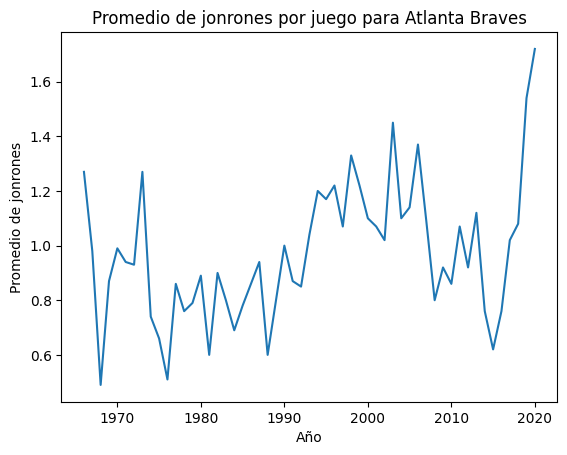

In [119]:
sns.lineplot(x="year", y="promedio_jonrones", data=df3[df3["team_name"] == "Atlanta Braves"])
plt.title("Promedio de jonrones por juego para Atlanta Braves")
plt.xlabel("Año")
plt.ylabel("Promedio de jonrones")
plt.show()


## Nube de nombres de los equipos

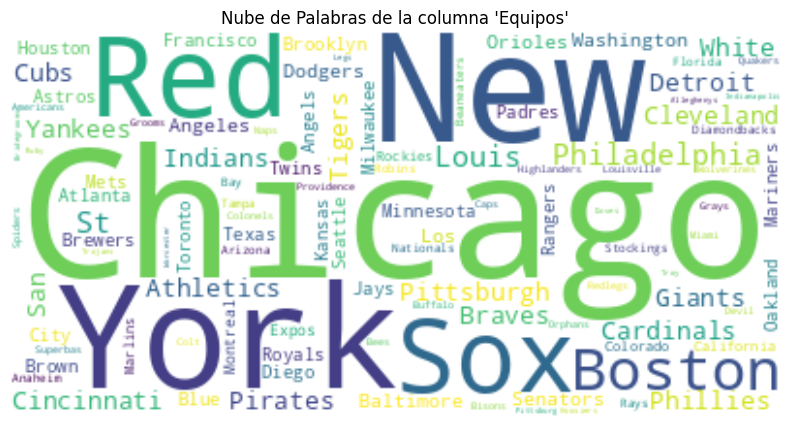

In [120]:
from wordcloud import WordCloud

# Concatenar los valores de la columna "team_name" en un solo texto
text_df3 = " ".join(df3["team_name"].values)

# Crear la nube de palabras
word_cloud_df3 = WordCloud(collocations=False, background_color='white').generate(text_df3)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud_df3, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de la columna 'Equipos' ")
plt.show()


###Estadísticas descriptivas para todas las columnas numéricas:

In [121]:
df3_describe = df3.describe()
print(df3_describe)


        Unnamed: 0         year         rank  games_played   home_games  \
count  2784.000000  2784.000000  2784.000000   2784.000000  2556.000000   
mean   1392.500000  1962.717672     3.980963    153.118534    78.014476   
std     803.815899    39.800654     2.237914     18.201875     6.971355   
min       1.000000  1876.000000     1.000000     57.000000    24.000000   
25%     696.750000  1930.000000     2.000000    154.000000    77.000000   
50%    1392.500000  1970.000000     4.000000    161.000000    81.000000   
75%    2088.250000  1997.000000     5.000000    162.000000    81.000000   
max    2784.000000  2020.000000    12.000000    165.000000    84.000000   

              wins       losses  runs_scored      at_bats         hits  ...  \
count  2784.000000  2784.000000  2784.000000  2784.000000  2784.000000  ...   
mean     76.189296    76.189296   687.576509  5227.864583  1367.210848  ...   
std      15.909342    15.853321   126.206345   606.564336   185.892343  ...   
min     

### Promedio de carreras anotadas por juego para el equipo Atlanta Braves:

In [122]:
average_runs_atlanta_braves = df3[df3["team_name"] == "Atlanta Braves"]["runs_scored"].mean()
print("Promedio de carreras anotadas por juego para Atlanta Braves:", average_runs_atlanta_braves)


Promedio de carreras anotadas por juego para Atlanta Braves: 689.7454545454545


###Efectividad de pitcheo promedio para el equipo Atlanta Braves (promedio de carreras permitidas por juego):

In [123]:
average_earned_runs_atlanta_braves = df3[df3["team_name"] == "Atlanta Braves"]["earned_runs_allowed"].mean()
print("Efectividad de pitcheo promedio para Atlanta Braves:", average_earned_runs_atlanta_braves)


Efectividad de pitcheo promedio para Atlanta Braves: 598.9636363636364


###Promedio de bateo para el equipo Atlanta Braves (porcentaje de hits sobre turnos al bate):

In [125]:
batting_average_atlanta_braves = (df3[df3["team_name"] == "Atlanta Braves"]["hits"] / df3[df3["team_name"] == "Atlanta Braves"]["at_bats"]).mean()
print("Promedio de bateo para Atlanta Braves:", batting_average_atlanta_braves)


Promedio de bateo para Atlanta Braves: 0.25726926882401424


###Cantidad total de shutout logradas por el equipo Atlanta Braves durante el período registrado:

In [124]:
total_shutouts_atlanta_braves = df3[df3["team_name"] == "Atlanta Braves"]["shutouts"].sum()
print("Total de shutout logradas por Atlanta Braves:", total_shutouts_atlanta_braves)


Total de shutout logradas por Atlanta Braves: 534


##Valores Faltantes

In [127]:
df3.isna().sum()

Unnamed: 0                   0
year                         0
league_id                    0
division_id               1346
rank                         0
games_played                 0
home_games                 228
wins                         0
losses                       0
division_winner           1374
wild_card_winner          2010
league_winner               28
world_series_winner        248
runs_scored                  0
at_bats                      0
hits                         0
doubles                      0
triples                      0
homeruns                     0
walks                        0
strikeouts_by_batters       16
stolen_bases                76
caught_stealing            708
batters_hit_by_pitch      1066
sacrifice_flies           1370
opponents_runs_scored        0
earned_runs_allowed          0
earned_run_average           0
complete_games               0
shutouts                     0
saves                        0
outs_pitches                 0
hits_all

In [128]:
# Calcular la longitud de las cadenas de texto en la columna "team_name" y asignarla a la nueva columna "team_name_length"
df3["team_name_length"] = df3["team_name"].str.len()

# Calcular la longitud de las cadenas de texto en la columna "ball_park" y asignarla a la nueva columna "ball_park_length"
df3["ball_park_length"] = df3["ball_park"].str.len()

# Rellenar los valores nulos en las nuevas columnas "team_name_length" y "ball_park_length" con 0
df3["team_name_length"] = df3["team_name_length"].fillna(0)
df3["ball_park_length"] = df3["ball_park_length"].fillna(0)


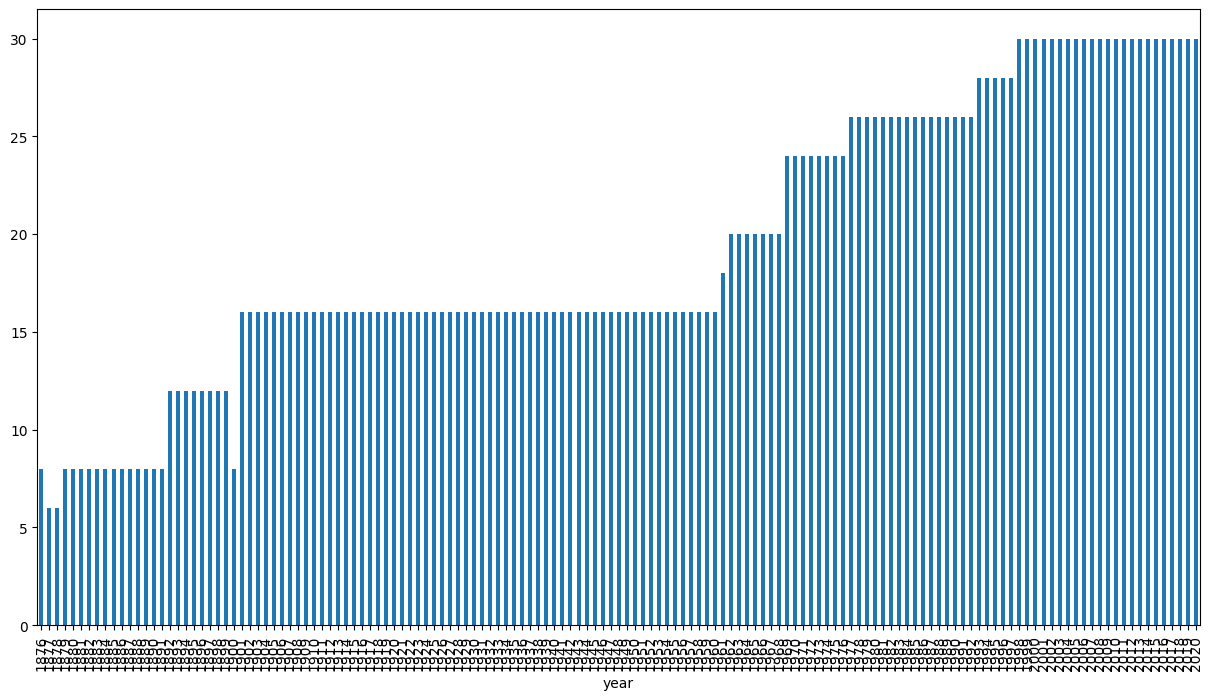

In [130]:
plt.figure(figsize = (15,8))
df3.groupby("year").size().plot(kind="bar");

##Comparativo de juegos.

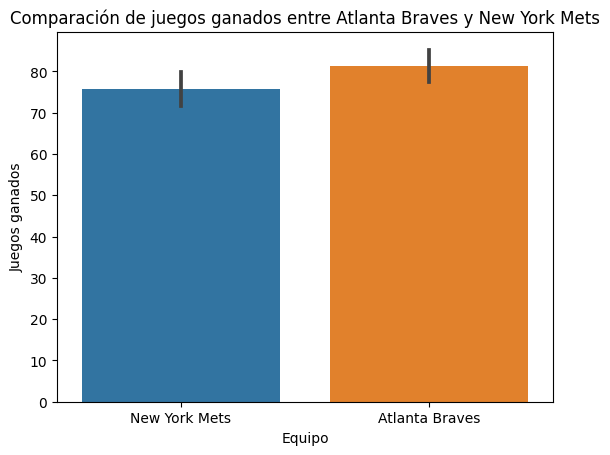

In [131]:
# Rellenar los valores faltantes con cero
df3.fillna(0, inplace=True)

# Crear un gráfico de barras comparando los juegos ganados de Atlanta Braves y New York Mets
sns.barplot(x="team_name", y="wins", data=df3[df3["team_name"].isin(["Atlanta Braves", "New York Mets"])])
plt.title("Comparación de juegos ganados entre Atlanta Braves y New York Mets")
plt.xlabel("Equipo")
plt.ylabel("Juegos ganados")
plt.show()


##Cantidad de juegos ganados

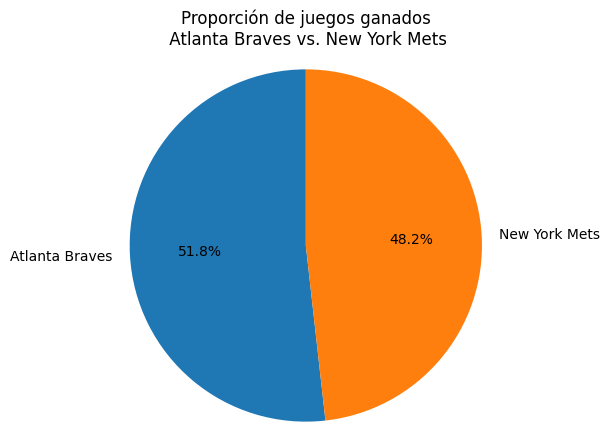

In [132]:
import matplotlib.pyplot as plt

# Rellenar los valores faltantes con cero
df3.fillna(0, inplace=True)

# Calcular la proporción de juegos ganados para Atlanta Braves y New York Mets
atlanta_wins = df3[df3["team_name"] == "Atlanta Braves"]["wins"].sum()
atlanta_games_played = df3[df3["team_name"] == "Atlanta Braves"]["games_played"].sum()

mets_wins = df3[df3["team_name"] == "New York Mets"]["wins"].sum()
mets_games_played = df3[df3["team_name"] == "New York Mets"]["games_played"].sum()

prop_atlanta_wins = atlanta_wins / atlanta_games_played
prop_mets_wins = mets_wins / mets_games_played

# Crear una lista con las proporciones de juegos ganados
proporciones = [prop_atlanta_wins, prop_mets_wins]

# Etiquetas para la gráfica
equipos = ["Atlanta Braves", "New York Mets"]

# Crear la gráfica de dona
plt.figure(figsize=(5, 5))
plt.pie(proporciones, labels=equipos, autopct='%1.1f%%', startangle=90)
plt.title("Proporción de juegos ganados\n Atlanta Braves vs. New York Mets")
plt.axis('equal')  # Para que la gráfica de dona sea un círculo.

# Mostrar la gráfica
plt.show()


## Comportamiento y liderasgo de los equipos Mets y Braves.

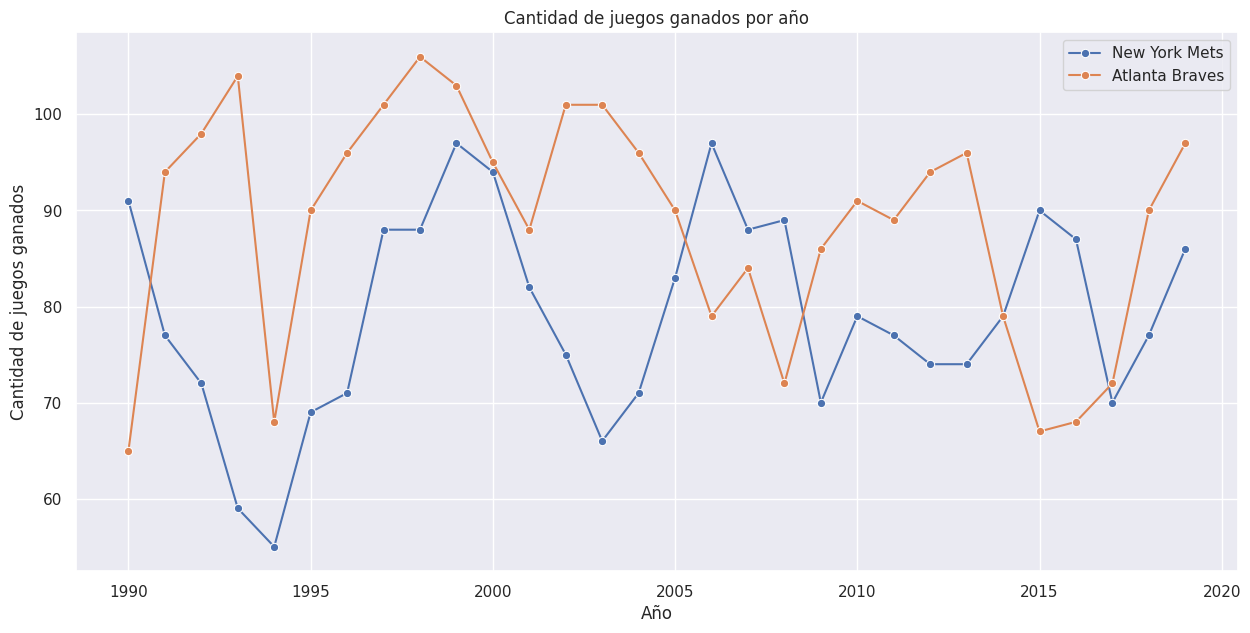

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "year" a tipo entero
df3["year"] = df3["year"].astype(int)


# Seleccionar los datos desde 1990 hasta 2020
df3_filtrado = df3[(df3["year"] >= 1990) & (df3["year"] <= 2019)]

# Seleccionar los datos cada 3 años
df3_filtrado = df3_filtrado[df3_filtrado["year"] % 1 == 0]

# Crear un DataFrame temporal con los datos de juegos ganados por año para Mets y Braves
temp_mets = df3_filtrado[df3_filtrado["team_name"] == "New York Mets"].groupby('year').agg({'wins': 'sum'}).reset_index()
temp_braves = df3_filtrado[df3_filtrado["team_name"] == "Atlanta Braves"].groupby('year').agg({'wins': 'sum'}).reset_index()

# Establecer estilo de fuente
sns.set(font_scale=1)

# Crear la gráfica usando displot
plt.figure(figsize=(15, 7))
plt.title("Cantidad de juegos ganados por año")
sns.lineplot(x="year", y="wins", data=temp_mets, label="New York Mets", marker='o')
sns.lineplot(x="year", y="wins", data=temp_braves, label="Atlanta Braves", marker='o')
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos ganados")
plt.legend()

# Mostrar la gráfica
plt.show()


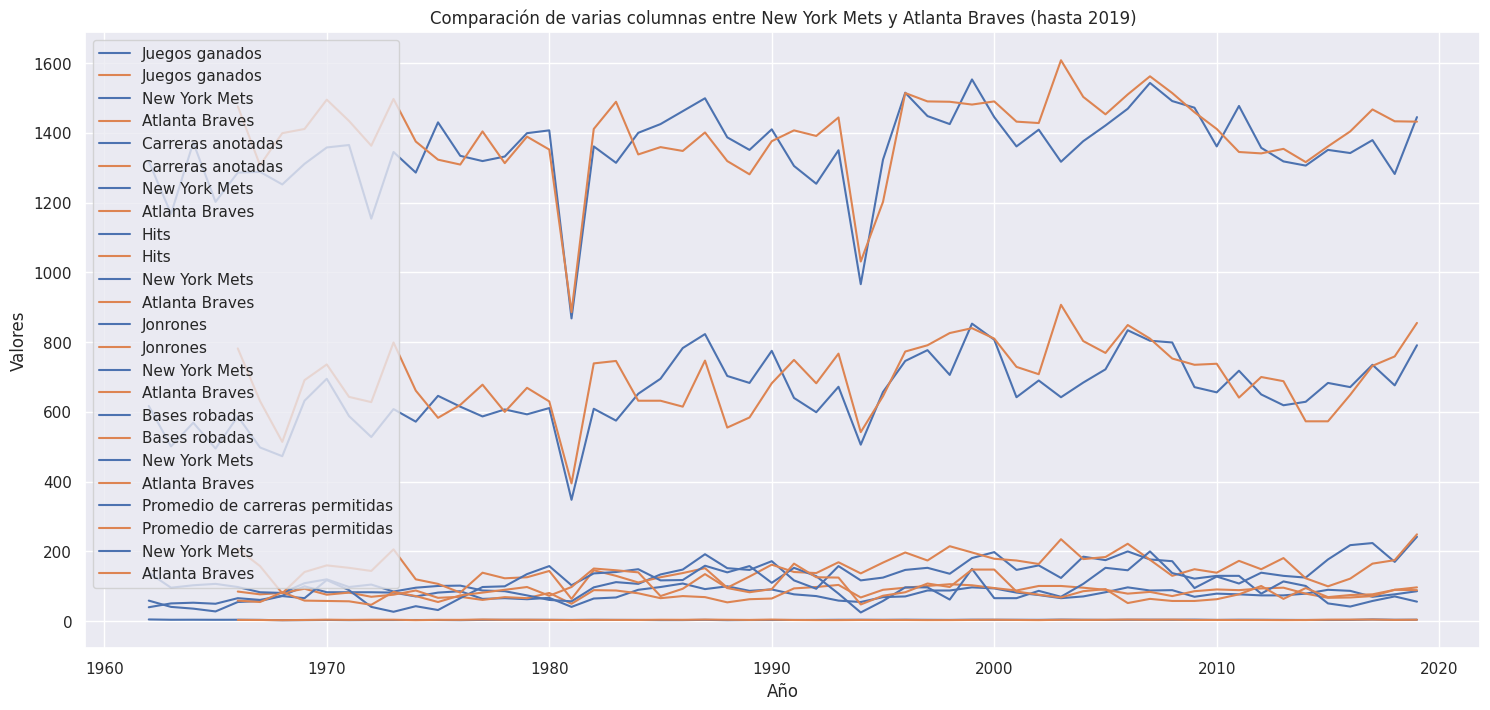

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los datos de interés para los New York Mets y los Atlanta Braves hasta el año 2019
df_mets_braves = df3[(df3["team_name"].isin(["New York Mets", "Atlanta Braves"])) & (df3["year"] <= 2019)]

# Establecer estilo de fuente
sns.set(font_scale=1)

# Crear la gráfica comparativa
plt.figure(figsize=(18, 8))
plt.title("Comparación de varias columnas entre New York Mets y Atlanta Braves (hasta 2019)")
sns.lineplot(x="year", y="wins", data=df_mets_braves, hue="team_name", label="Juegos ganados")
sns.lineplot(x="year", y="runs_scored", data=df_mets_braves, hue="team_name", label="Carreras anotadas")
sns.lineplot(x="year", y="hits", data=df_mets_braves, hue="team_name", label="Hits")
sns.lineplot(x="year", y="homeruns", data=df_mets_braves, hue="team_name", label="Jonrones")
sns.lineplot(x="year", y="stolen_bases", data=df_mets_braves, hue="team_name", label="Bases robadas")
sns.lineplot(x="year", y="earned_run_average", data=df_mets_braves, hue="team_name", label="Promedio de carreras permitidas")
plt.xlabel("Año")
plt.ylabel("Valores")
plt.legend()

# Mostrar la gráfica
plt.show()


###Juegos ganados por año

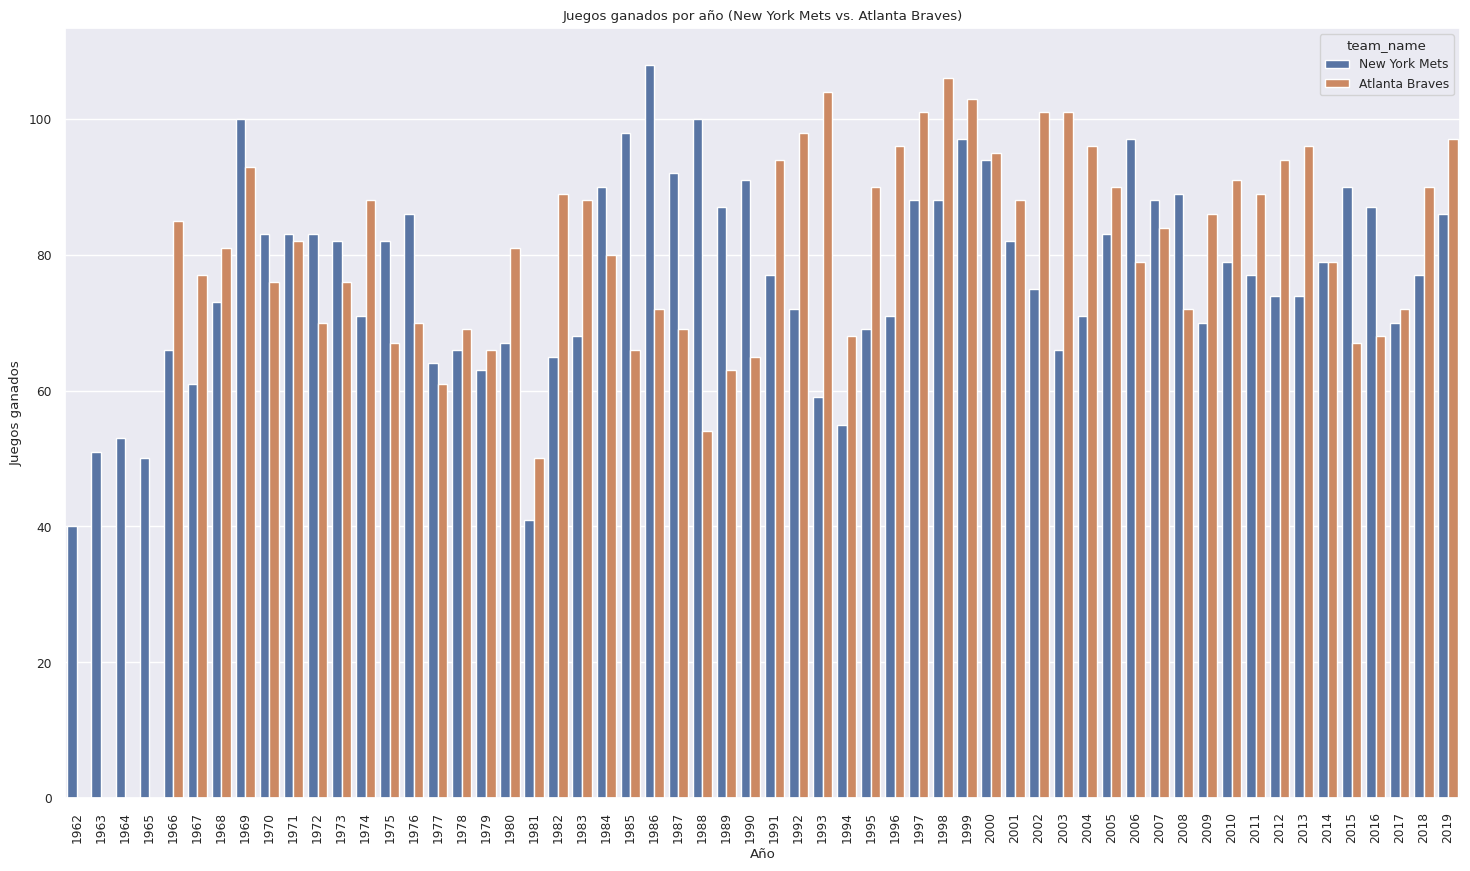

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con los datos de interés para los New York Mets y los Atlanta Braves hasta el año 2019
df_mets_braves = df3[(df3["team_name"].isin(["New York Mets", "Atlanta Braves"])) & (df3["year"] <= 2019)]

# Establecer estilo de fuente y tamaño de figura
sns.set(rc={'figure.figsize':(18, 10)})
sns.set(font_scale=0.8)

# Gráfica de Juegos ganados
plot = sns.barplot(x="year", y="wins", hue="team_name", data=df_mets_braves)
plot.set(xlabel='Año', ylabel='Juegos ganados')
plot.set_title('Juegos ganados por año (New York Mets vs. Atlanta Braves)')

# Rotar los títulos de los ejes X a 90 grados
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Mostrar la gráfica
plt.show()


##Asistencia de los espectadores en los estadios

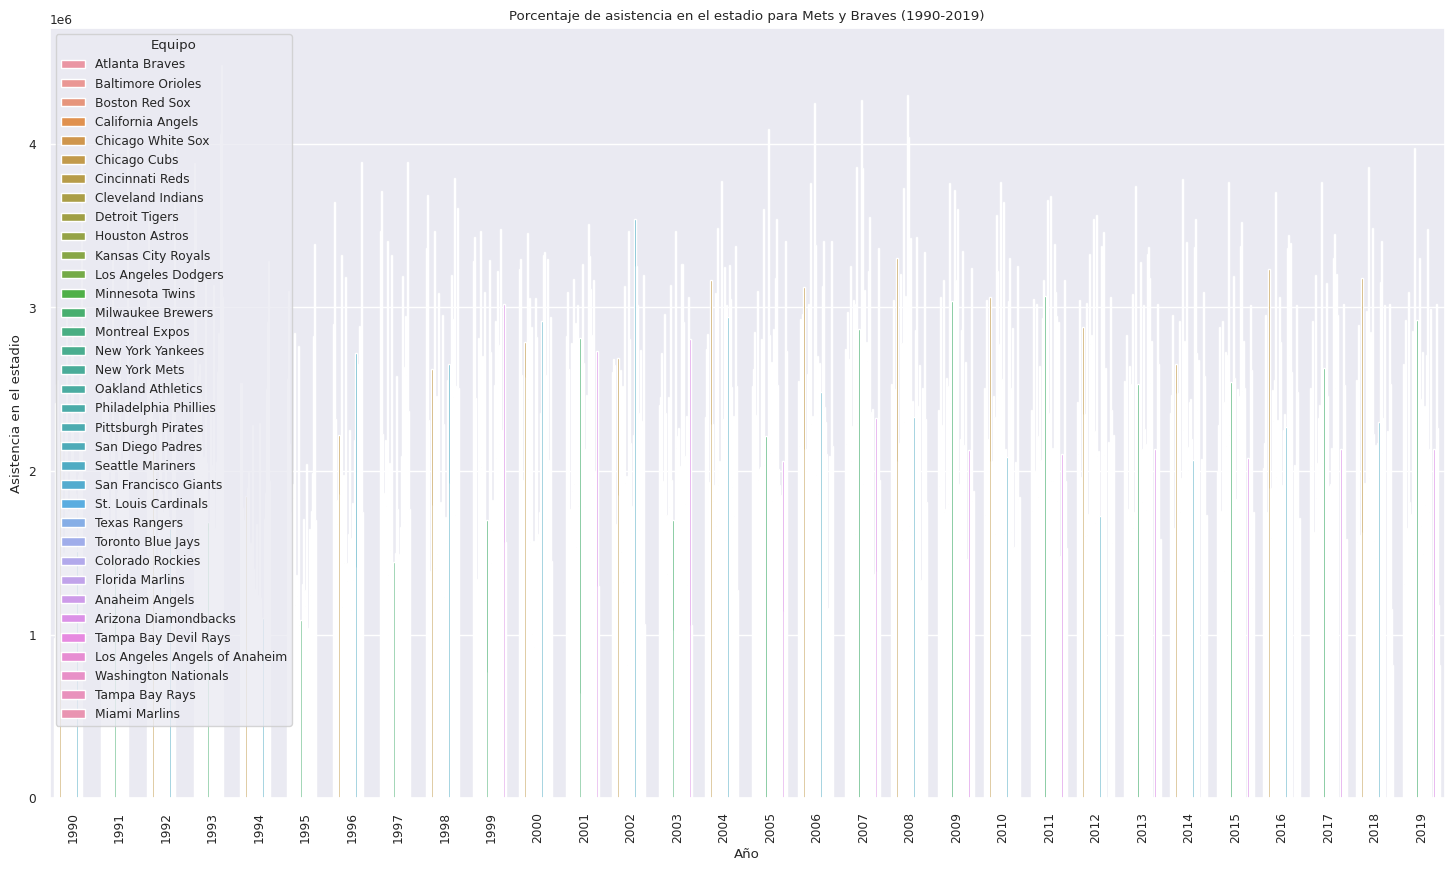

In [137]:
# Filtrar los datos desde 1990 hasta 2019
df3_filtered = df3[(df3["year"] >= 1990) & (df3["year"] <= 2019)]

# Crear el gráfico de barras
sns.set(font_scale=0.8)
sns.barplot(x="year", y="home_attendance", data=df3_filtered, hue="team_name")
plt.xlabel("Año")
plt.ylabel("Asistencia en el estadio")
plt.title("Porcentaje de asistencia en el estadio para Mets y Braves (1990-2019)")
plt.legend(title="Equipo", loc="upper left")
plt.xticks(rotation=90)
plt.show()


###Ganados Global

count    2784.000000
mean       76.189296
std        15.909342
min         9.000000
25%        67.000000
50%        78.000000
75%        88.000000
max       116.000000
Name: wins, dtype: float64


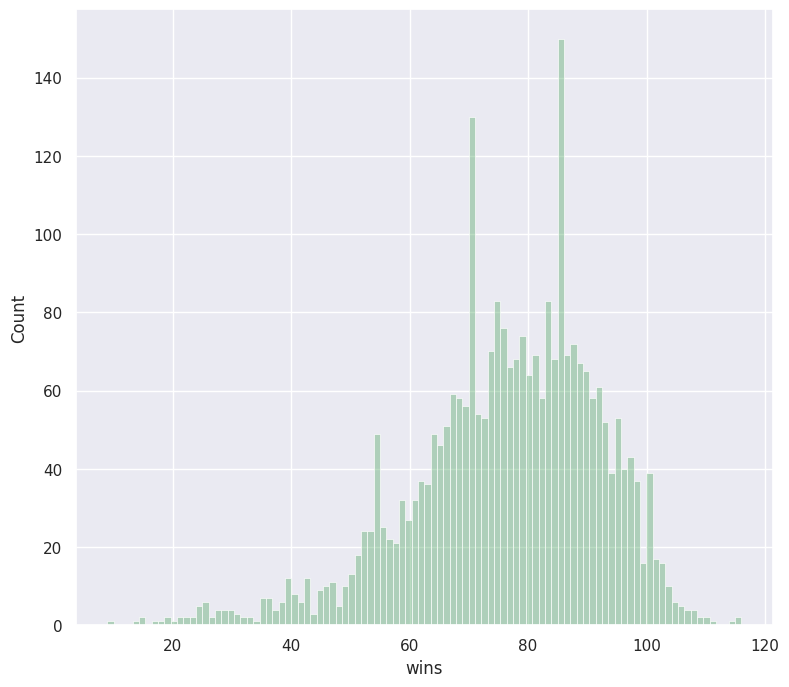

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df3['wins'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df3['wins'], color='g', bins=100, alpha=0.4);


In [159]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [160]:
df=df3
df_num = df.select_dtypes(include = ['float64', 'int64', 'object'])
df_num.head()

,Unnamed: 0,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,...,home_attendance,nueva_columna,columna_transformada,porcentaje_victorias,ganador_world_series,promedio_carreras,ganador_liga,promedio_jonrones,team_name_length,ball_park_length
0,1,1876,NL,0,4,70,0.0,39,31,0,...,0.0,6.728571,192,55.71,0,6.73,0,0.13,15,19
1,2,1876,NL,0,1,66,0.0,52,14,0,...,0.0,9.454545,262,78.79,0,9.45,0,0.12,23,19
2,3,1876,NL,0,8,65,0.0,9,56,0,...,0.0,3.661538,102,13.85,0,3.66,0,0.06,15,14
3,4,1876,NL,0,2,69,0.0,47,21,0,...,0.0,6.217391,192,68.12,0,6.22,0,0.03,19,26
4,5,1876,NL,0,5,69,0.0,30,36,0,...,0.0,4.057971,136,43.48,0,4.06,0,0.09,16,24


#ATLANTA BRAVES
analisis de equipo.

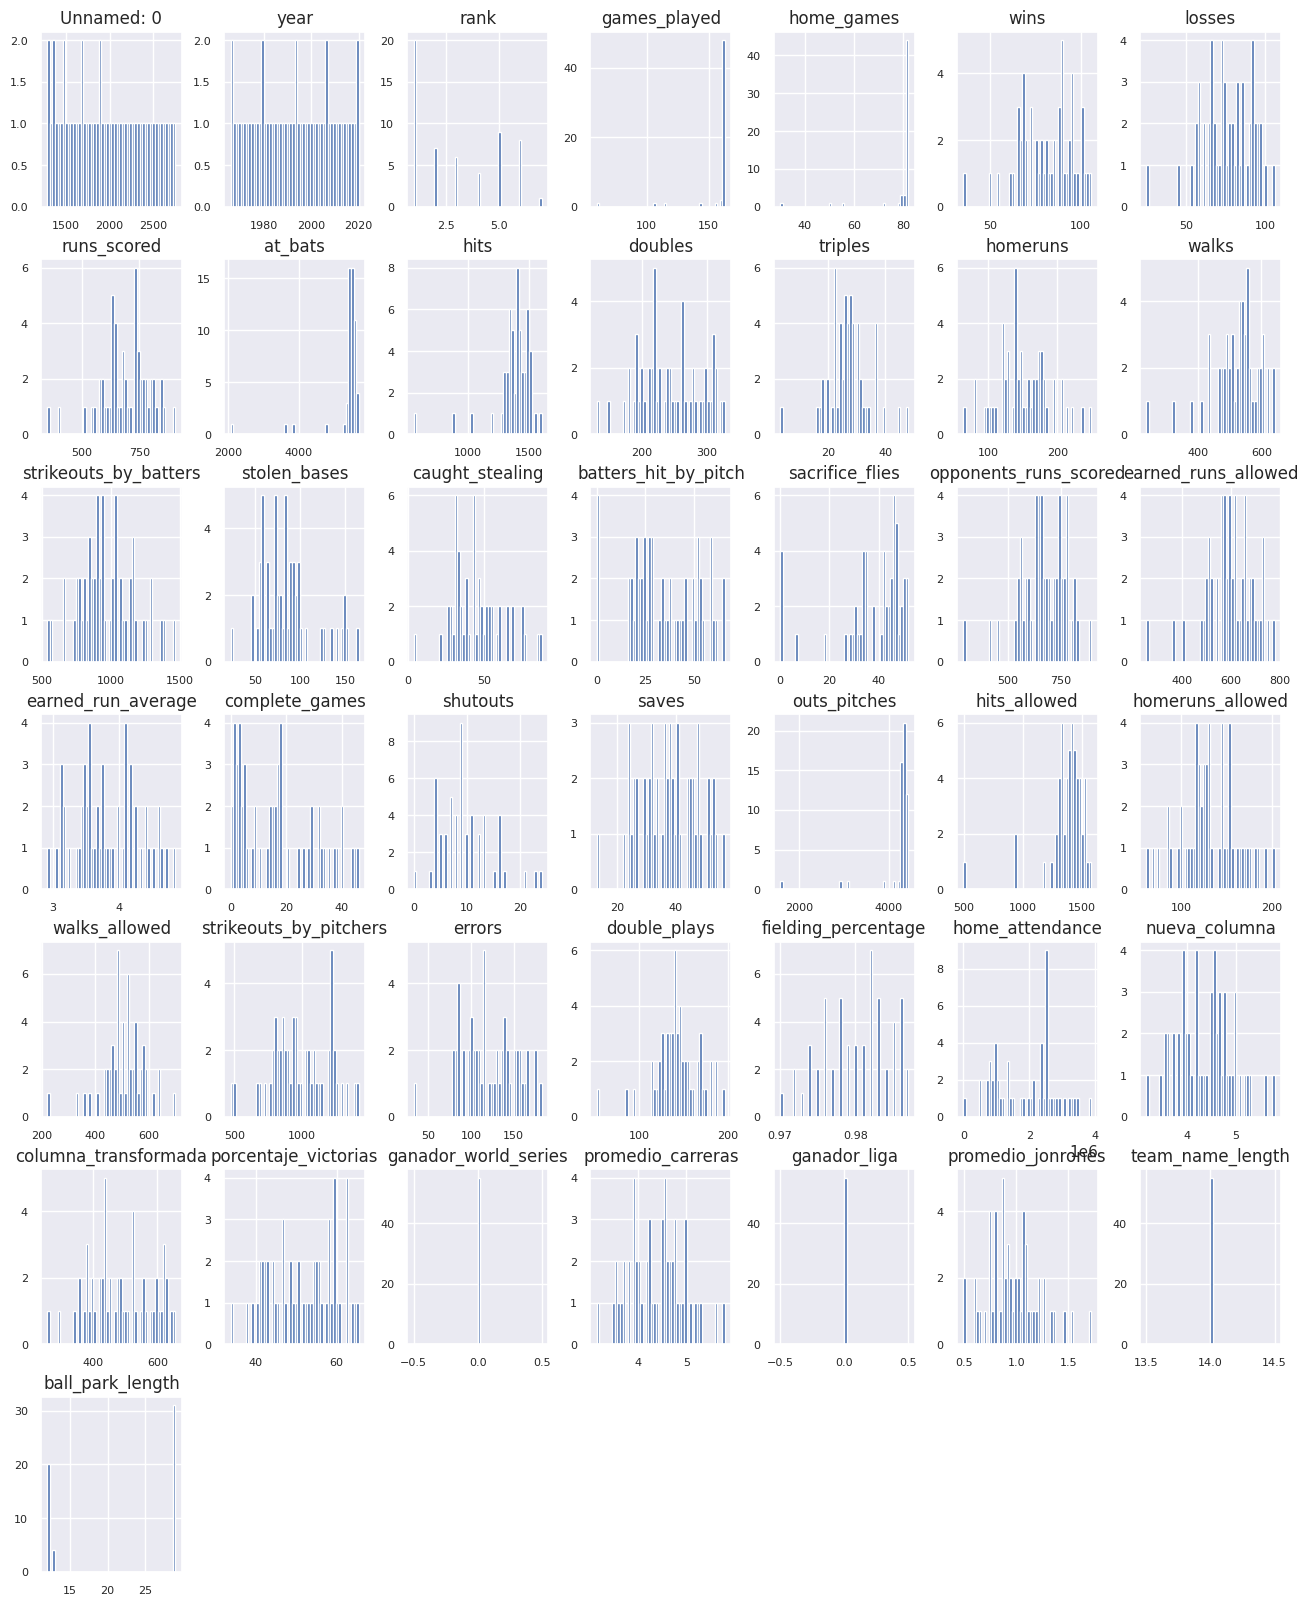

In [161]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los datos del equipo "Atlanta Braves"
df_atlanta_braves = df_num[df_num['team_name'] == 'Atlanta Braves']

# Crear un histograma para todas las columnas numéricas del equipo "Atlanta Braves"
df_atlanta_braves.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Evitar que se muestren las informaciones verbosas de matplotlib
plt.show()


In [156]:

# Filtrar el DataFrame para obtener solo los datos del equipo "Atlanta Braves"
df_atlanta_braves = df_num[df_num['team_name'] == 'Atlanta Braves']
df_num_corr = df_num.corr()['wins'][:-1] # -1
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with wins:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with wins:
wins                    1.000000
porcentaje_victorias    0.813822
runs_scored             0.647859
hits                    0.643439
outs_pitches            0.611721
at_bats                 0.595668
walks                   0.583737
games_played            0.582093
shutouts                0.512859
rank                   -0.721480
Name: wins, dtype: float64


<ipython-input-156-e57420545137>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num_corr = df_num.corr()['wins'][:-1] # -1


##Heat map.

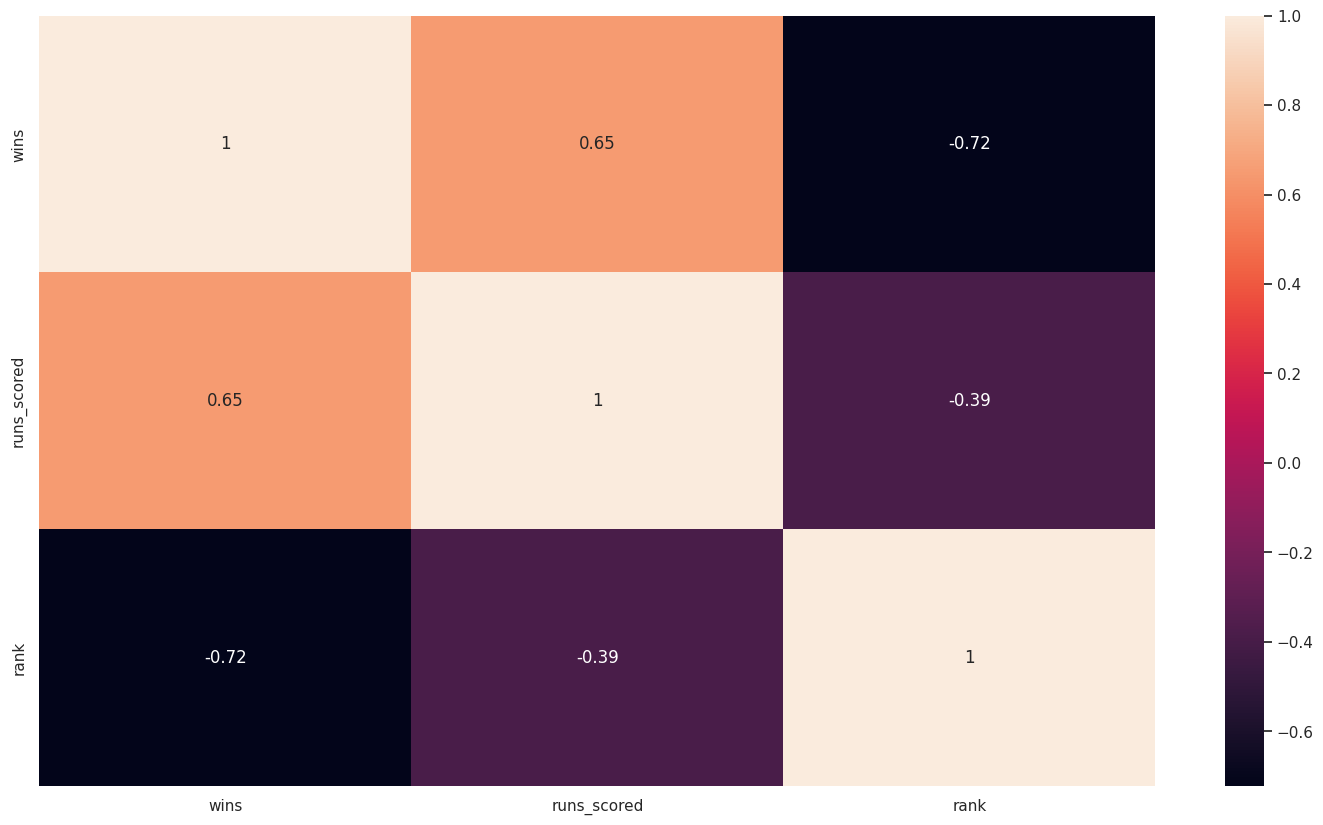

In [158]:
sns.heatmap(df[["wins","runs_scored","rank"]].corr(), annot=True);